### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [26]:
#parameters
N_epochs = 10
N_train = 10000
N_valid = 1000
sigma = 0.1

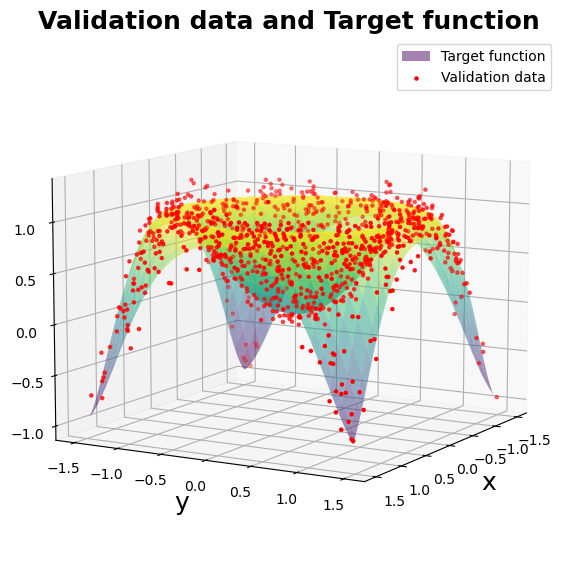

In [27]:
#Generate input data
lim = 3/2

x_train = np.random.uniform(-lim, lim, N_train)
y_train = np.random.uniform(-lim, lim, N_train)
x_valid = np.random.uniform(-lim, lim, N_valid)
y_valid = np.random.uniform(-lim, lim, N_valid)

# Target function
def f(x, y):
    return np.sin(x ** 2 + y ** 2)

# Generate noisy target and validation data
z_target = f(x_valid, y_valid)
z_train = np.random.normal(f(x_train, y_train), sigma)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

# Plot target function and validation data
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface of the target function
x_surf = np.arange(-lim, lim, 0.05)
y_surf = np.arange(-lim, lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
ax.plot_surface(X_surf, Y_surf, f(X_surf, Y_surf), cmap='viridis', alpha=0.5, label='Target function')

# Scatter plot of validation data
ax.scatter(x_valid, y_valid, z_valid, marker='.', color='r', label='Validation data')

# Set labels and legend
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.set_title('Validation data and Target function', fontsize=18, fontweight='bold')
ax.legend()
ax.view_init(10, 30)

plt.show()

In [28]:
# Define the model (suggested by ChatGPT)
model = Sequential([
    Dense(64, activation='relu',input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1)  # No activation function for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                192       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Fit the model to the training data
history = model.fit(
    x=np.column_stack((x_train, y_train)), y=z_train,  # Convert x_train, y_train to 2D array
    batch_size=32, epochs=N_epochs,
    shuffle=True,
    validation_data=(np.column_stack((x_valid, y_valid)), z_valid)  # Convert x_valid, y_valid to 2D array
)

Epoch 1/10
313/313 [==============================] - 2s 3ms/step - loss: 0.1519 - val_loss: 0.1138
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0882 - val_loss: 0.0565
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0381 - val_loss: 0.0190
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0154 - val_loss: 0.0119
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0121 - val_loss: 0.0112
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0117 - val_loss: 0.0113
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0116 - val_loss: 0.0123
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0115 - val_loss: 0.0109

TEST DATA evaluation
Test loss: 0.010865490883588791

EXACT CURVE evaluation
Test loss:      0.000981287332251668
Test accuracy:  0.000981287332251668


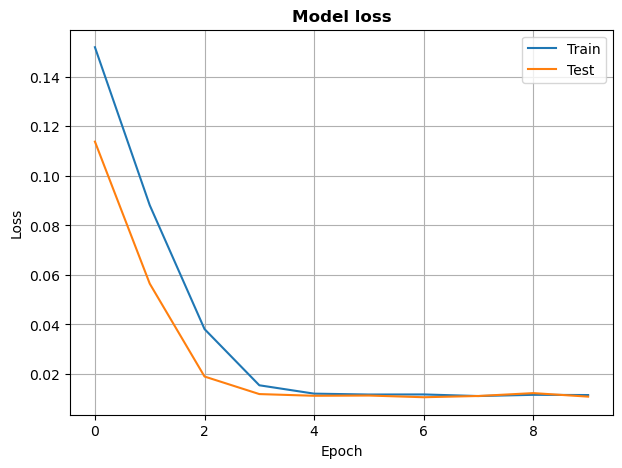

63/63 [==============================] - 0s 2ms/step


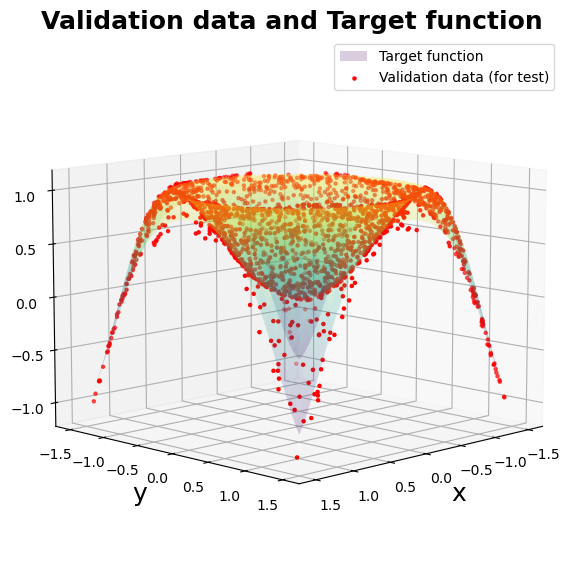

In [30]:
# Evaluate with test data
print("TEST DATA evaluation")
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=0)
print('Test loss:', score)
print()

# Evaluate with the exact curve
print("EXACT CURVE evaluation")
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_target, batch_size=32, verbose=0)
print('Test loss:     ', score)
print('Test accuracy: ', score)

# Training history visualization
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight="bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Compare model predictions with target function
x_predicted = np.random.uniform(-lim, lim, 2000)
y_predicted = np.random.uniform(-lim, lim, 2000)
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface of the target function
ax.plot_surface(X_surf, Y_surf, f(X_surf, Y_surf), cmap='viridis', alpha=0.2, label='Target function')

# Scatter plot of predicted data
ax.scatter(x_predicted, y_predicted, z_predicted, marker='.', color='r', label='Validation data (for test)')

# Set labels and legend
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.set_title('Validation data and Target function', fontsize=18, fontweight='bold')
ax.legend()
ax.view_init(10, 45)

plt.show()


63/63 [==============================] - 0s 2ms/step


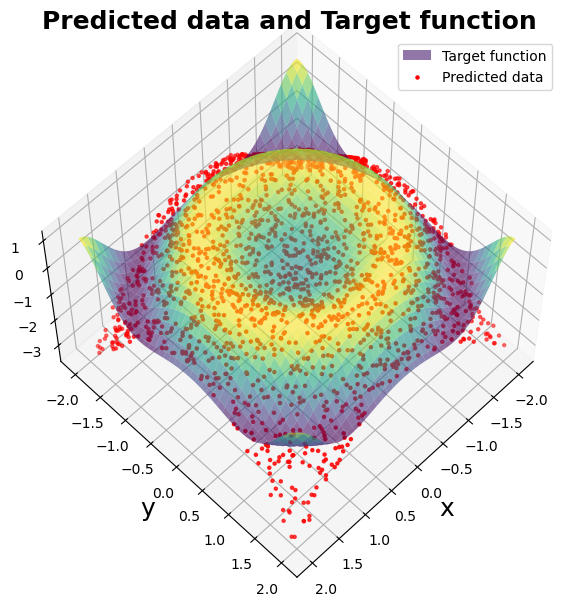

In [36]:
# prediction 
lim = 2
x_predicted = np.random.uniform(-lim, lim, 2000)
y_predicted = np.random.uniform(-lim, lim, 2000)
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted)

X_surf = np.arange(-lim, lim, 0.05)
Y_surf = np.arange(-lim, lim, 0.05)
X_surf, Y_surf = np.meshgrid(X_surf, Y_surf)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface of the target function
ax.plot_surface(X_surf, Y_surf, f(X_surf, Y_surf), cmap='viridis', alpha=0.6, label='Target function')

# Scatter plot of predicted data
ax.scatter(x_predicted, y_predicted, z_predicted, marker='.', color='r', label='Predicted data')

# Set labels and legend
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.set_title('Predicted data and Target function', fontsize=18, fontweight='bold')
ax.legend()
ax.view_init(60, 45)

plt.show()